In [142]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
import math


In [2]:
os.chdir('./data')
df = pd.read_excel('Mock.xlsx')
os.chdir('../')

In [3]:
df

,A,B,C
0,0.0,0.000000,0.000000
1,0.0,0.000000,0.666667
2,0.0,0.000000,0.500000
3,0.0,0.000000,1.000000
4,0.0,0.666667,0.000000
...,...,...,...
59,1.0,0.500000,1.000000
60,1.0,1.000000,0.000000
61,1.0,1.000000,0.666667
62,1.0,1.000000,0.500000


In [4]:
# https://mathworld.wolfram.com/TernaryDiagram.html
df['XT'] = (0.5* ((df['A'] + 2 * df['B']) / (df['A'] + df['B'] + df['C'])))
df['YT'] = ((math.sqrt(3)/2) * ((df['A']) / (df['A'] + df['B'] + df['C'])))

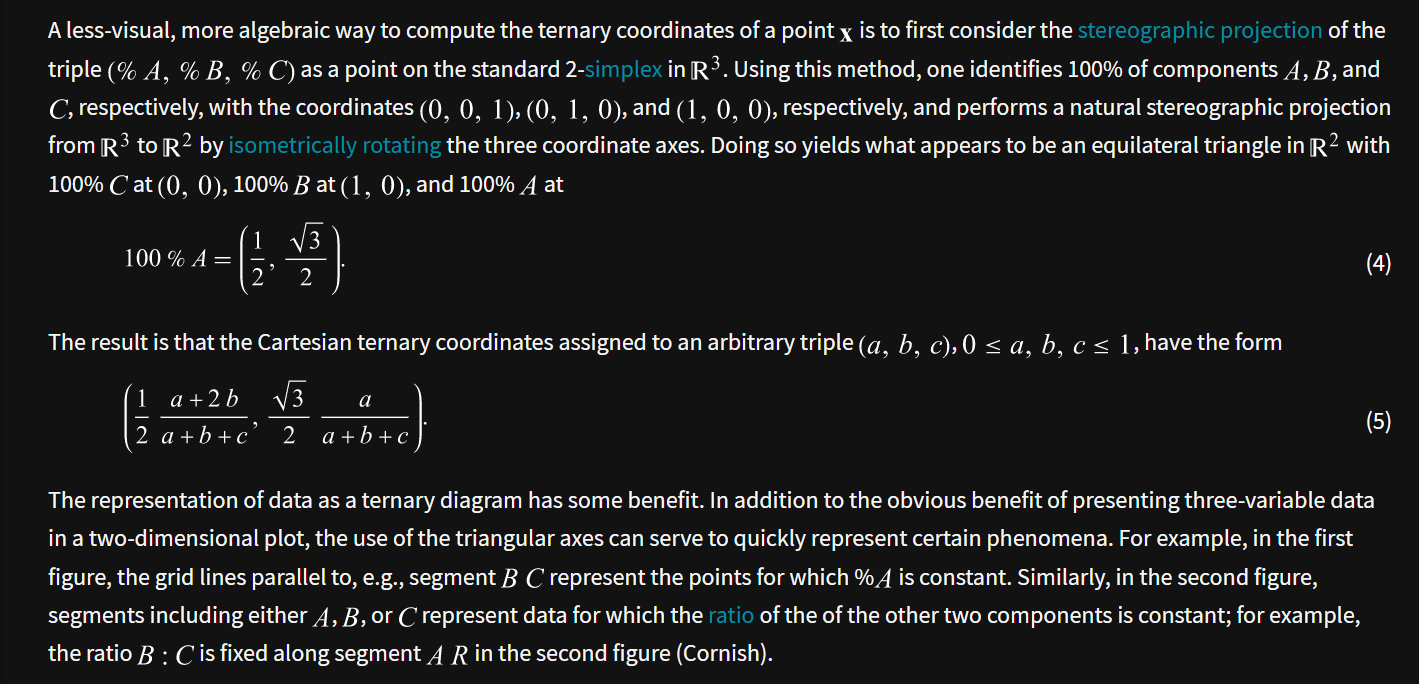

In [5]:
Image(filename='img1.png',width=800, height=400)

In [6]:
df

,A,B,C,XT,YT
0,0.0,0.000000,0.000000,NaN,NaN
1,0.0,0.000000,0.666667,0.0000,0.000000
2,0.0,0.000000,0.500000,0.0000,0.000000
3,0.0,0.000000,1.000000,0.0000,0.000000
4,0.0,0.666667,0.000000,1.0000,0.000000
...,...,...,...,...,...
59,1.0,0.500000,1.000000,0.4000,0.346410
60,1.0,1.000000,0.000000,0.7500,0.433013
61,1.0,1.000000,0.666667,0.5625,0.324760
62,1.0,1.000000,0.500000,0.6000,0.346410


In [77]:
fig = go.Figure()
fig.layout.template = 'plotly_dark'
fig.update_layout(height= (math.sqrt(3)/2) * 1000, width = 1000, showlegend = False)
fig.add_trace(go.Scatter(x=[0, 0.5, 1, 0],y=[0, math.sqrt(3)/2, 0, 0],mode="lines",name="Outer Triangle", opacity = 1, line_color = '#7F7F7F', line_width = 5)) #line=dict(color="#7F7F7F")
#fig.add_trace(go.Scatter(x=[0.5, 1, 0], y=[math.sqrt(3)/2, 0, 0], mode="markers+text",name="Axes Markers", text=["Pure A", "Pure B", "Pure C"], textposition="top center", textfont_size = 25))
fig.add_trace(go.Scatter(x=[0.5], y=[math.sqrt(3)/2 + 0.02], mode="text",name="Axes Markers", text=["Pure A"], textposition="top center", textfont_size = 25))
fig.add_trace(go.Scatter(x=[1.02], y=[-0.02], mode="text",name="Axes Markers", text=["Pure B"], textposition="bottom right", textfont_size = 25))
fig.add_trace(go.Scatter(x=[-0.02], y=[-0.02], mode="text",name="Axes Markers", text=["Pure C"], textposition="bottom left", textfont_size = 25))
fig.add_trace(go.Scatter(x=[0.25 - 0.10], y=[math.sqrt(3)/4], mode="text",name="Axes Markers", text=["A + C"], textposition="middle center", textfont_size = 25))
fig.add_trace(go.Scatter(x=[0.75 + 0.10], y=[math.sqrt(3)/4], mode="text",name="Axes Markers", text=["A + B"], textposition="middle center", textfont_size = 25))
fig.add_trace(go.Scatter(x=[0.5], y=[0 - 0.025], mode="text",name="Axes Markers", text=["C + B"], textposition="bottom center", textfont_size = 25))
fig.update_xaxes(range = [-0.2, 1.2], showgrid=False, zeroline = False,  visible = False, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(range = [-0.2, 1.2*math.sqrt(3)/2], showgrid=False, zeroline = False, visible = False, gridwidth=1, gridcolor='LightPink')

arrow1 = go.layout.Annotation(dict(x= 0.5, y=math.sqrt(3)/2 ,xref="x", yref="y",text="",showarrow=True, axref = "x", ayref='y',ax= 0.5,ay= 0,arrowhead = 2, arrowwidth=5, opacity = 1, arrowcolor='#7F7F7F'))
arrow2 = go.layout.Annotation(dict(x= 1, y=0 ,xref="x", yref="y",text="",showarrow=True, axref = "x", ayref='y',ax= 0.25,ay= math.sqrt(3)/4,arrowhead = 2, arrowwidth=5, opacity = 1, arrowcolor='#7F7F7F'))
arrow3 = go.layout.Annotation(dict(x= 0, y=0 ,xref="x", yref="y",text="",showarrow=True, axref = "x", ayref='y',ax= 0.75,ay= math.sqrt(3)/4,arrowhead = 2, arrowwidth=5, opacity = 1, arrowcolor='#7F7F7F'))
fig.update_layout(annotations=[arrow1, arrow2, arrow3])

fig.add_traces(list(px.scatter(df, x = 'XT', y = 'YT', hover_data = ['A','B','C'], template = 'plotly_dark').select_traces()))
fig.show()


Text(0.5, 0.965, 'Ternary Plot 2')

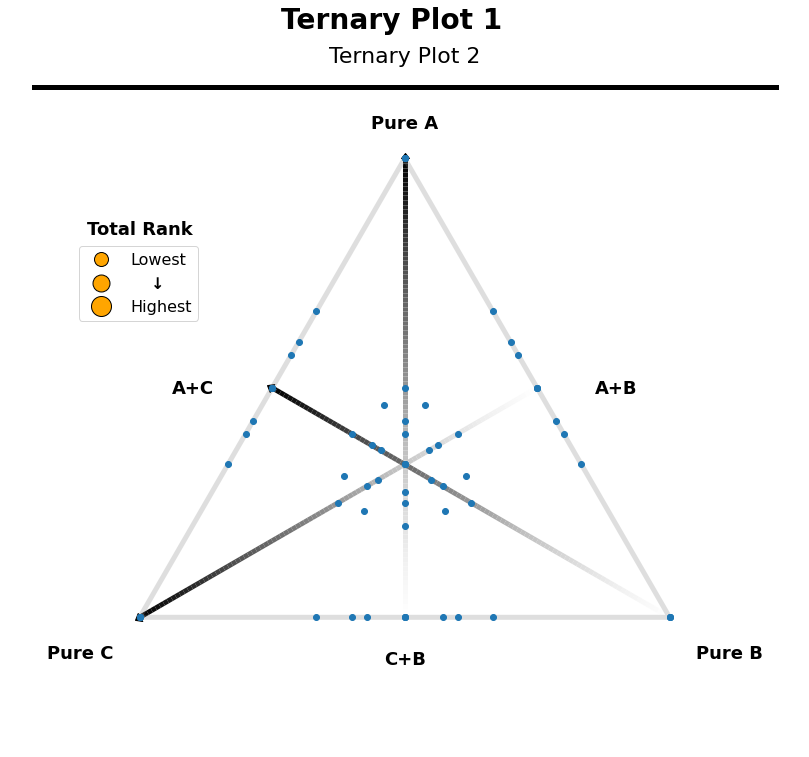

In [296]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patheffects as pe

smallfont = 18
midfont = 22
largefont = 28
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(15, (math.sqrt(3)/2)*15))
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25*math.sqrt(3)/2])
ax.scatter(x = df['XT'], y = df['YT'], zorder=3)
#ax.axline((0, 0), (0.5, math.sqrt(3)/2))
ax.plot([0, 0.5, 1, 0],[0, math.sqrt(3)/2, 0, 0], zorder=2, color = '#7F7F7F', alpha = 0.25,  linewidth = 5)
ax.set_aspect("equal")
rainbowarrow(ax, (0.5, 0), (0.5, math.sqrt(3)/2), cmap="Greys", n=100, lw=5)
rainbowarrow(ax, (0.75, math.sqrt(3)/4), (0,0), cmap="Greys", n=100, lw=5)
rainbowarrow(ax, (1, 0), (0.25, math.sqrt(3)/4), cmap="Greys", n=100, lw=5)

ax.text(x=0.5, y=math.sqrt(3)/2 + 0.05,s="Pure A", va = 'bottom', ha = 'center', fontsize = smallfont, fontweight = 'bold')
ax.text(x=1.05, y= -0.05, s="Pure B",va='top', ha='left', fontsize=18, fontweight = 'bold')
ax.text(x=-0.05, y= -0.05, s="Pure C",va='top', ha='right', fontsize=18, fontweight = 'bold')

ax.text(x=0.25 - 0.15, y=math.sqrt(3)/4 ,s="A+C", va = 'center', ha = 'center', fontsize = smallfont, fontweight = 'bold')
ax.text(x=0.75 + 0.15, y=math.sqrt(3)/4 ,s="A+B", va = 'center', ha = 'center', fontsize = smallfont, fontweight = 'bold')
ax.text(x=0.5, y=-0.0625 ,s="C+B", va = 'top', ha = 'center', fontsize = smallfont, fontweight = 'bold')

ax.text(x=0.0, y= 0.75 ,s="Total Rank", va = 'top', ha = 'center', fontsize = smallfont, fontweight = 'bold')
# path_effects=[pe.Stroke(linewidth=2, foreground='black')]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Lowest', markerfacecolor='orange', markeredgecolor = 'black', markersize=14),
                   Line2D([0], [0], marker='o', color='w', label = '    $\\bf{\u2193}$', markerfacecolor='orange', markeredgecolor= 'black', markersize=17),
                   Line2D([0], [0], marker='o', color='w', label='Highest', markerfacecolor='orange', markeredgecolor= 'black' , markersize=20)]
ax.axis("off")
ax.plot([-0.2, 1.2],[1, 1], zorder=2, color = 'black', alpha = 1,  linewidth = 5)
ax.legend(handles=legend_elements, bbox_to_anchor=(0.25, 0.725), prop={'size': 16}, frameon = True)

plt.suptitle('Ternary Plot 1', fontsize = largefont, fontweight = 'bold', y=0.92)
plt.title('Ternary Plot 2', fontsize = midfont, y= 0.965)


In [55]:
# https://tousu.in/qa/?qa=830541/
import matplotlib.transforms
import matplotlib.path
from matplotlib.collections import LineCollection

def rainbowarrow(ax, start, end, cmap="Greys", n=50,lw=3):
    cmap = plt.get_cmap(cmap,n)
    # Arrow shaft: LineCollection
    x = np.linspace(start[0],end[0],n)
    y = np.linspace(start[1],end[1],n)
    points = np.array([x,y]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1],points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, linewidth=lw)
    lc.set_array(np.linspace(0,1,n))
    ax.add_collection(lc)
    # Arrow head: Triangle
    tricoords = [(0,-0.4),(0.5,0),(0,0.4),(0,-0.4)]
    angle = np.arctan2(end[1]-start[1],end[0]-start[0])
    rot = matplotlib.transforms.Affine2D().rotate(angle)
    tricoords2 = rot.transform(tricoords)
    tri = matplotlib.path.Path(tricoords2, closed=True)
    ax.scatter(end[0],end[1], c=1, s=(2*lw)**2, marker=tri, cmap=cmap,vmin=0, zorder = 2)
    ax.autoscale_view()